[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/basic-neural-net/blob/master/using_autograd.ipynb)

In [1]:
!pip install torch

In [0]:
import torch
import matplotlib.pyplot as plt

#parametrs
layers=3
batch_size=1000
input_feature=100
l1_neurno=50
l2_neurno=25
l3_neurno=1
num_epoch=1300
lr_rate=0.01
if torch.cuda.is_available():
   processor="cuda"
else:
   processor="cpu"
    
device=torch.device(processor)

#input,output,weight initialization
Z=torch.randint(1,100,(input_feature,batch_size),device=device)
Y=torch.randint(0,2,(l3_neurno,batch_size),device=device)
W1=torch.rand(l1_neurno,input_feature,device=device,requires_grad=True)
W2=torch.rand(l2_neurno,l1_neurno,device=device,requires_grad=True)
W3=torch.rand(l3_neurno,l2_neurno,device=device,requires_grad=True)
loss=[]
# functions
def normalize(Z):
   sh=Z.size()[0]
   mu=Z.mean(dim=1).view(sh,1)
   z=Z-mu
   std=z.std(dim=1).view(sh,1)
   Z=z/std
   return Z

for epoch in range(num_epoch):
    #forwardpass
    
    Ypred=torch.sigmoid(normalize(W3.mm(normalize(W2.mm(normalize(W1.mm(normalize(Z))).clamp(min=0))).clamp(min=0))))
  
                             
     #finding loss
    Loss=-(Y.mm(torch.log(Ypred.t()))+(1-Y).mm(torch.log(1-Ypred.t())))
    Loss.backward()
    loss.append(Loss/batch_size)
    with torch.no_grad():
     #weight update
      
       W1-=lr_rate*(W1.grad)
       W2-=lr_rate*(W2.grad)
       W3-=lr_rate*(W3.grad)
       W1.grad.zero_()
       W2.grad.zero_()
       W3.grad.zero_()
                        


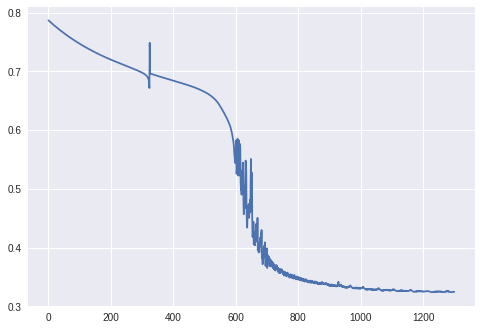

In [28]:
plt.figure()
plt.plot(loss)
plt.show()

In [29]:
def test(n):
  Z=torch.randint(1,100,(input_feature,n))
  Y=torch.randint(0,2,(l3_neurno,n))
  L1=W1.mm(normalize(Z))
  Z1=normalize(L1).clamp(min=0)
  L2=W2.mm(Z1)
  Z2=normalize(L2).clamp(min=0)
  L3=W3.mm(Z2)
  Ypred=torch.sigmoid(normalize(L3))
  print('Y:',Y,'Ypred:',torch.round(Ypred))
  
  
test(10)

('Y:', tensor([[1., 1., 0., 0., 1., 0., 0., 0., 1., 1.]]), 'Ypred:', tensor([[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.]], grad_fn=<RoundBackward>))
